## Download data from Google Drive
#### Install `driveanon` package
The `%%capture` comand hides the printed text.  
You can comment this out to see the output from pip. 

In [1]:
%%capture
!pip install git+https://github.com/friedrichknuth/driveanon.git

In [2]:
import driveanon

#### Check folder content
This is the url to our Google Drive data directory called ASO_LiDAR_TIFs  
https://drive.google.com/drive/folders/18RBI_SmsowSNbZnmtP2S-xWeWEId7-bm?usp=sharing  
Notice the random string of characters that we will call the `folder_blob_id`  

In [23]:
folder_blob_id = '18RBI_SmsowSNbZnmtP2S-xWeWEId7-bm'
file_names, file_blob_ids = driveanon.list_blobs(folder_blob_id,
                                          '.tif',
                                          )

In [28]:
file_names

['ASO_GrandMesa_Mosaic_2020Feb1-2_dtmvf_mos_3m.tif',
 'ASO_GrandMesa_Mosaic_2020Feb1-2_fsrdemvf_mos_3m.tif',
 'ASO_snowfree_GrandMesa_2016Sep26_dtmvf_mos_3m.tif',
 'ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif']

In [29]:
file_blob_ids

['1Dgy2hOkUPZjbtEDiS6imnHAZg0IFR5Zy',
 '1YnZDpGMpn_dd7XYMoQ4T6PdFR_1TJAV6',
 '1EeGyUG7dSH5AGa6WzFmKGZ6YhkxDmYRP',
 '12jhMafrXHnoD3YLWtQRPWMSIi2an9kEz']

#### Save files to disk
Next let's iterate over the `file_names` list and use driveanon to save the files to disk.

In [26]:
for blob_id in file_blob_ids:
    driveanon.save(blob_id)

#### Let's see what we got.

In [27]:
! ls -al

total 417748
drwxrwsr-x  3 jovyan users      4096 Jul 13 22:34 .
drwxrwsr-x 10 jovyan users      4096 Jul 13 16:53 ..
-rw-r--r--  1 jovyan users 106934192 Jul 13 22:15 ASO_GrandMesa_Mosaic_2020Feb1-2_dtmvf_mos_3m.tif
-rw-r--r--  1 jovyan users 106934192 Jul 13 22:15 ASO_GrandMesa_Mosaic_2020Feb1-2_fsrdemvf_mos_3m.tif
-rw-r--r--  1 jovyan users 106941102 Jul 13 22:15 ASO_snowfree_GrandMesa_2016Sep26_dtmvf_mos_3m.tif
-rw-r--r--  1 jovyan users 106941102 Jul 13 22:15 ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif
drwxr-sr-x  2 jovyan users      4096 Jul 13 21:46 .ipynb_checkpoints
-rw-r--r--  1 jovyan users       249 Jul 13 21:47 notes.txt
-rw-r--r--  1 jovyan users      2454 Jul 13 22:34 pulling_in_data_from_google_drive.ipynb


#### Create data directory and move files there

In [30]:
! mkdir data

In [31]:
! mv ASO*.tif data/

In [1]:
! ls -al data/

total 417736
drwxrwsr-x 2 jovyan users      4096 Jul 13 22:35 .
drwxrwsr-x 4 jovyan users      4096 Jul 14 04:24 ..
-rw-rw-r-- 1 jovyan users 106934192 Jul 13 22:15 ASO_GrandMesa_Mosaic_2020Feb1-2_dtmvf_mos_3m.tif
-rw-rw-r-- 1 jovyan users 106934192 Jul 13 22:15 ASO_GrandMesa_Mosaic_2020Feb1-2_fsrdemvf_mos_3m.tif
-rw-rw-r-- 1 jovyan users 106941102 Jul 13 22:15 ASO_snowfree_GrandMesa_2016Sep26_dtmvf_mos_3m.tif
-rw-rw-r-- 1 jovyan users 106941102 Jul 13 22:15 ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif


## Data wrangling

#### Inspect the metadata for the `tif` files

In [35]:
# ! gdalinfo data/ASO_GrandMesa_Mosaic_2020Feb1-2_dtmvf_mos_3m.tif
# ! gdalinfo data/ASO_GrandMesa_Mosaic_2020Feb1-2_fsrdemvf_mos_3m.tif
# ! gdalinfo data/ASO_snowfree_GrandMesa_2016Sep26_dtmvf_mos_3m.tif
! gdalinfo data/ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif


Driver: GTiff/GeoTIFF
Files: data/ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif
Size is 7576, 3528
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 12N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 12N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-111,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1]

#### Looks like these tif files do not have a no data value defined. Let's fix that. (I inspected the data array and see that the nodata value is -9999)

In [3]:
import glob

In [4]:
tif_files = sorted(glob.glob('data/*.tif'))
tif_files

['data/ASO_GrandMesa_Mosaic_2020Feb1-2_dtmvf_mos_3m.tif',
 'data/ASO_GrandMesa_Mosaic_2020Feb1-2_fsrdemvf_mos_3m.tif',
 'data/ASO_snowfree_GrandMesa_2016Sep26_dtmvf_mos_3m.tif',
 'data/ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif']

In [5]:
for file_name in tif_files:
    ! gdal_edit.py -a_nodata -9999 {file_name}

In [6]:
! gdalinfo data/ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif

Driver: GTiff/GeoTIFF
Files: data/ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif
Size is 7576, 3528
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 12N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 12N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-111,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1]

#### That's better. The nodata value is now defined (see end of output above). We want to define this so that software like `rasterio` automatically knows which values to mask out when plotting.

## Plotting

In [65]:
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

#### Read one of the raster files

In [63]:
tif_files

['data/ASO_GrandMesa_Mosaic_2020Feb1-2_dtmvf_mos_3m.tif',
 'data/ASO_GrandMesa_Mosaic_2020Feb1-2_fsrdemvf_mos_3m.tif',
 'data/ASO_snowfree_GrandMesa_2016Sep26_dtmvf_mos_3m.tif',
 'data/ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif']

In [62]:
src = rasterio.open(tif_files[0],masked=True)
# src = rasterio.open(tif_files[1],masked=True)
# src = rasterio.open(tif_files[2],masked=True)
# src = rasterio.open(tif_files[3],masked=True)

#### Check min and max value
We want to know the min and max values in the raster array so that we can set the colorbar limits accordingly.   
I am importing a custom function from my `tools.py` file in my directory.   
The autoreload commands enable making changes to `tools.py` which will be automatically loaded into the running notebook, without restarting the notebook.   

In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import tools

In [55]:
# read in data array
array = src.read(1)
# replace nodata value with nan
array = tools.replace_and_fill_nodata_value(array, src.nodata, np.nan)


In [66]:
print('min elevation:', np.nanmin(array))
print('max elevation:', np.nanmax(array))

min elevation: 2684.06
max elevation: 3303.0378


#### Plot with `show` command and modify with `matplotlib`
See list of matplotlib colormaps here https://matplotlib.org/stable/tutorials/colors/colormaps.html  

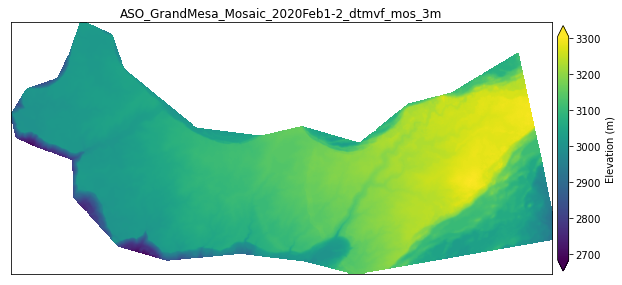

In [61]:
cmap = 'viridis'
vmin = np.nanmin(array)
vmax = np.nanmax(array)

fig,ax = plt.subplots(figsize=(10,5))

show(src, 
     ax=ax,
     cmap=cmap,
     vmin = vmin,
     vmax = vmax)

sm = plt.cm.ScalarMappable(cmap=cmap,
                               norm=plt.Normalize(vmin = vmin, 
                                                  vmax = vmax))
cbar = fig.colorbar(sm, 
                    ax=ax,
                    pad=0.01,
                    extend='both',
                    fraction=0.02)

cbar.set_label(label='Elevation (m)')

ax.set_xticks(())
ax.set_yticks(())

title = tif_files[0].split('/')[-1].split('.')[0]
ax.set_title(title);

## Add basemap
Use `contextily`

## Difference with snow free DEM
Use `rioxarray`

## Pull in ERA5 data
Date: February 8, 2020   
Bounding box: [-108.34115668,   38.82320553, -107.72839859,   39.19563035]